## Preliminaries: finite-difference scheme for heat conduction

In [28]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import inv, norm

n = 3 # number of qubits, num_qubits
N = pow(2,n) # number of mesh nodes

# T_old
T_old = np.ones(N)
for i in range(N):
    T_old[i] = 1 + (1/2)*np.sin(2*np.pi*(i+1)/N)
print(T_old)

# Linear system C*T_new = T_old
# T_new = inv(C)*T_old
r = 0.5 # = delta_t*alpha/(delta_x**2) = Fo, Fourier number 
d = np.ones(N)*(1+2*r)
od = np.ones(N-1)*(-r)
C = np.diag(d, 0) + np.diag(od, -1) + np.diag(od, 1)
C[0,N-1] = -r
C[N-1,0] = -r
print(C)

# T_new
T_new = inv(C) @ T_old
print(T_new)

[1.35355339 1.5        1.35355339 1.         0.64644661 0.5
 0.64644661 1.        ]
[[ 2.  -0.5  0.   0.   0.   0.   0.  -0.5]
 [-0.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -0.5]
 [-0.5  0.   0.   0.   0.   0.  -0.5  2. ]]
[1.27345908 1.38672954 1.27345908 1.         0.72654092 0.61327046
 0.72654092 1.        ]


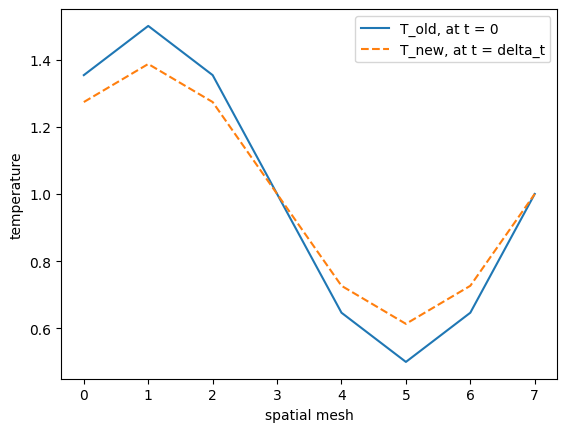

In [29]:
import matplotlib.pyplot as plt
plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new, at t = delta_t', linestyle='dashed')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('temperature')
plt.show()

## Preliminaries: direct normalization (by classical solution)

In [30]:
# T_old
TT_old = np.sum(T_old**2)
b0 = np.sqrt(TT_old)
print(b0)
b = T_old/b0
print(b)
print(sum(b**2)) # (normalized)

# T_new
TT_new = np.sum(T_new**2)
x0 = np.sqrt(TT_new)
x_th = T_new/x0 # (theoretical)
print(x_th)
print(sum(x_th**2)) # (normalized)

# Linear system (normalized)
f = np.sqrt(TT_new/TT_old) 
A = C*f # (normalized)

# Check
print(b * b0 - T_old) # normalized linear system
print(x_th * x0 - T_new) # back to original units
print(C @ T_new - T_old) # original system
print( A @ x_th - b ) # normalized system for quantum computing

3.0
[0.45118446 0.5        0.45118446 0.33333333 0.2154822  0.16666667
 0.2154822  0.33333333]
1.0
[0.43429041 0.47291927 0.43429041 0.34103209 0.24777377 0.20914491
 0.24777377 0.34103209]
0.9999999999999999
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]
[0. 0. 0. 0. 0. 0. 0. 0.]
[-6.66133815e-16  2.22044605e-16  0.00000000e+00  0.00000000e+00
 -2.22044605e-16 -1.11022302e-16  1.11022302e-16 -1.11022302e-16]
[-2.77555756e-16  1.11022302e-16 -5.55111512e-17  1.11022302e-16
 -5.55111512e-17 -5.55111512e-17 -2.77555756e-17 -5.55111512e-17]


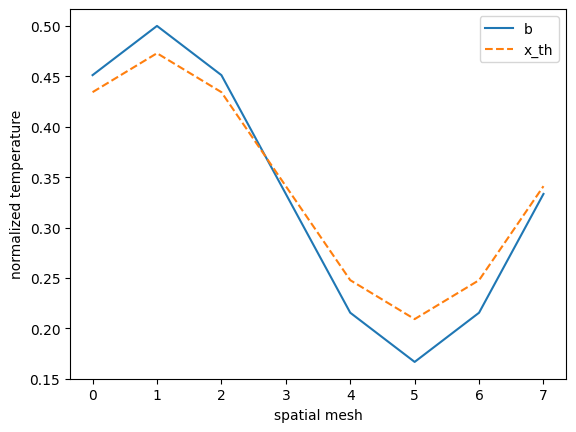

In [31]:
plt.plot(b, label='b')
plt.plot(x_th, label='x_th', linestyle='dashed')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('normalized temperature')
plt.show()

In [32]:
# PROOF for normalization
print( C @ T_new - T_old ) # original system
print( (C @ T_new)/(TT_new * TT_old) - T_old/(TT_new * TT_old) )
print( (C @ x_th)/(np.sqrt(TT_new) * TT_old) - b/(TT_new * np.sqrt(TT_old)) )
print( np.sqrt(TT_new/TT_old) * C @ x_th - b )
print( f * C @ x_th - b )
print( A @ x_th - b ) # normalized system for quantum computing

[-6.66133815e-16  2.22044605e-16  0.00000000e+00  0.00000000e+00
 -2.22044605e-16 -1.11022302e-16  1.11022302e-16 -1.11022302e-16]
[-1.04083409e-17  3.46944695e-18  0.00000000e+00  0.00000000e+00
 -3.46944695e-18 -1.73472348e-18  1.73472348e-18 -1.73472348e-18]
[-1.04083409e-17  3.46944695e-18 -6.93889390e-18  1.73472348e-18
 -5.20417043e-18 -1.73472348e-18 -1.73472348e-18 -3.46944695e-18]
[-2.77555756e-16  1.11022302e-16 -5.55111512e-17  1.11022302e-16
 -5.55111512e-17 -5.55111512e-17 -2.77555756e-17 -5.55111512e-17]
[-2.77555756e-16  1.11022302e-16 -5.55111512e-17  1.11022302e-16
 -5.55111512e-17 -5.55111512e-17 -2.77555756e-17 -5.55111512e-17]
[-2.77555756e-16  1.11022302e-16 -5.55111512e-17  1.11022302e-16
 -5.55111512e-17 -5.55111512e-17 -2.77555756e-17 -5.55111512e-17]


## Quantum Fourier Transform

In [33]:
from scipy.linalg import dft

# METHOD #1
# (2) ultiply by 1/sqrt(N)
tildeb_raw = np.fft.fft(b)/np.sqrt(N)

# (1) swap positive and negative frequencies
tildeb = np.conj(tildeb_raw)
print(tildeb)

# METHOD #2
mydft_raw = dft(N)/np.sqrt(N)
mydft = np.conj(mydft_raw)
tildeb_bis = mydft @ b
tildeb_bis_filtered = tildeb_bis.copy()
tildeb_bis_filtered[np.abs(tildeb_bis) < 1e-4] = 0
print(tildeb_bis_filtered)
print(tildeb_bis_filtered.shape)
#print(tildeb_bis - tildeb) # ok

[ 9.42809042e-01-0.00000000e+00j  1.66666667e-01+1.66666667e-01j
  3.92523115e-17-0.00000000e+00j -1.96261557e-17+9.81307787e-18j
  7.85046229e-17-0.00000000e+00j -1.96261557e-17-9.81307787e-18j
  3.92523115e-17-0.00000000e+00j  1.66666667e-01-1.66666667e-01j]
[0.94280904+0.j         0.16666667+0.16666667j 0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.16666667-0.16666667j]
(8,)


## Quantum observable

In [34]:
# Quantum observable for T_new, or better for |x> (normalized)
# O = A^dag ( I - |b><b| ) A
# <x|O|x> --> 0 (minimum) 
# 
# because A^dag = f C^dag then
# O = f^2 C^dag ( I - |b><b| ) C
# which has the same minimum for |x>
# 
# Ref: PHYSICAL REVIEW A 107, 052422 (2023)
# Depth analysis of variational quantum algorithms for the heat equation

O = np.identity(N)-np.outer(b,b)
O = np.matmul(O,C)
C_dag = np.transpose(C)
O = np.matmul(C_dag,O)

print(np.transpose(O)-O) # symmetric operator

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.77555756e-17
   2.77555756e-17  0.00000000e+00  5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.38777878e-17  0.00000000e+00  1.38777878e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.44089210e-16
   5.55111512e-17  0.00000000e+00  4.16333634e-17  0.00000000e+00]
 [-2.77555756e-17  0.00000000e+00  4.44089210e-16  0.00000000e+00
   0.00000000e+00 -5.55111512e-17 -6.93889390e-18  0.00000000e+00]
 [-2.77555756e-17 -1.38777878e-17 -5.55111512e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17
   0.00000000e+00  0.00000000e+00 -4.44089210e-16  0.00000000e+00]
 [-5.55111512e-17 -1.38777878e-17 -4.16333634e-17  6.93889390e-18
  -5.55111512e-17  4.44089210e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [35]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator

observable_1 = SparsePauliOp.from_operator(O)
print(observable_1)
print(len(observable_1.paulis))

SparsePauliOp(['III', 'IIX', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ', 'XII', 'XIX', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ', 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI', 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ'],
              coeffs=[ 4.3656726 +0.j, -2.12752751+0.j,  0.12728074+0.j, -1.12752751+0.j,
 -0.01160814+0.j, -1.0164164 +0.j, -0.01160814+0.j, -0.0164164 +0.j,
  0.01160814+0.j, -0.08789482+0.j, -0.09469472+0.j,  0.15049703+0.j,
 -1.09469472+0.j,  0.01160814+0.j,  1.0164164 -0.j,  0.01160814+0.j,
  0.0164164 +0.j, -0.01160814+0.j,  0.01487594-0.j,  0.01487594-0.j,
  0.0359137 -0.j,  0.0359137 -0.j, -0.0359137 +0.j, -0.0359137 +0.j,
 -0.08670334+0.j, -0.08670334+0.j, -0.01487594+0.j, -0.08670334+0.j,
 -0.08670334+0.j, -0.01487594+0.j, -0.0359137 +0.j, -0.0359137 +0.j,
 -0.0359137 +0.j,  0.0359137 +0.j])
34


In [36]:
# ATTENTION !!! put O
OF = np.matmul(O,np.conj(mydft))
FOF = np.matmul(mydft,OF)
print(FOF.shape)
for row in FOF:
    print("  |  ".join(f"{x:+10.2f}" for x in row))

observable_2 = SparsePauliOp.from_operator(FOF)
print(observable_2)
print(len(observable_2.paulis))

diagFOF = np.diag(FOF)
DFOF = np.diag(diagFOF)
print(DFOF.shape)
for row in DFOF:
    print("  |  ".join(f"{x:+10.2f}" for x in row))

observable_3 = SparsePauliOp.from_operator(DFOF)
print(observable_3)
print(len(observable_3.paulis))

(8, 8)
+0.11+0.00j  |  -0.20+0.20j  |  -0.00+0.00j  |  +0.00-0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  -0.20-0.20j
-0.20-0.20j  |  +1.58+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  +0.00-0.09j
-0.00-0.00j  |  +0.00+0.00j  |  +4.00-0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  +0.00+0.00j  |  -0.00-0.00j  |  +0.00-0.00j
-0.00-0.00j  |  -0.00-0.00j  |  +0.00+0.00j  |  +7.33-0.00j  |  +0.00-0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  -0.00-0.00j
-0.00-0.00j  |  +0.00-0.00j  |  +0.00+0.00j  |  +0.00-0.00j  |  +9.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
-0.00+0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  +7.33-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
-0.00+0.00j  |  -0.00-0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  +4.00+0.00j  |  -0.00-0.00j
-0.20+0.20j  |  +0.00+0.09j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +1.58-0.00j
S

In [37]:
from numpy.linalg import eigvalsh
eigenvalues = eigvalsh(O)
print(eigenvalues)

[-6.65727323e-16  1.59695367e+00  1.67157288e+00  4.00000000e+00
  4.00000000e+00  7.32842712e+00  7.32842712e+00  9.00000000e+00]


## Loss/cost function for VQE

In [38]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, hamiltonian, params)
    cost = estimator.run([pub]).result()[0].data.evs

    return cost

## Ansatz

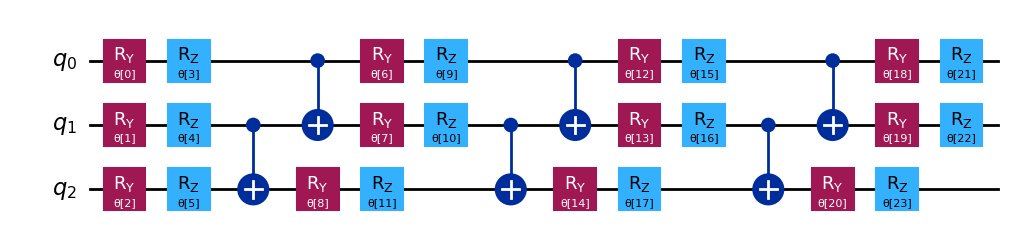

In [39]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
#from qiskit.circuit.library import efficient_su2

import numpy as np

num_qubits = n

# (1) most RATIONAL ansatz
#reference_circuit = QuantumCircuit(num_qubits)
#reference_circuit.x(0)
#variational_form = TwoLocal(
#    num_qubits,
#    rotation_blocks=["ry"],
#    entanglement_blocks="cx",
#    entanglement="linear",
#    reps=2,
#)
#raw_ansatz = reference_circuit.compose(variational_form)

# (2) BEST heuristic ansatz
raw_ansatz = EfficientSU2(num_qubits)

# (3) BEST heuristic ansatz and FASTER
#raw_ansatz = efficient_su2(num_qubits)

raw_ansatz.decompose().draw('mpl')

In [40]:
raw_ansatz.num_parameters

24

## Quantum simulator

In [41]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.primitives import StatevectorSampler as Sampler

estimator = Estimator()
sampler = Sampler()

#from qiskit_aer import AerSimulator
#from qiskit_aer.primitives import EstimatorV2 as AerEstimator
#from qiskit_aer.primitives import SamplerV2 as AerSampler
#aer_estimator = AerEstimator()
#aer_sampler = AerSampler()

In [42]:
import numpy as np

# Initial (arbitrary) set of parameter
theta0 = np.ones(raw_ansatz.num_parameters)
print(theta0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Quantum minimization

In [43]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

# Variational quantum eigensolver (VQE)
# See https://learning.quantum.ibm.com/tutorial/variational-quantum-eigensolver
start_time = time.time()

result = minimize(cost_func_vqe, theta0, args=(raw_ansatz.decompose(), observable_1, estimator), 
                  method="COBYLA", 
                  tol = 1e-3, # better tolerance is possible but it would require more iterations/time
                  options={'maxiter': 1000, 'disp': True})
print(result)

# Type of solver. Should be one of
# ‘Nelder-Mead’, nfev: 2461 (tol = 1e-2)
# ‘Powell’, nfev: 10027 (tol = 1e-2), disaster
# ‘CG’, nfev: 1600 (tol = 1e-2)
# ‘BFGS’, nfev: 650 (tol = 1e-2), not bad
# ‘L-BFGS-B’, nfev: 675 (tol = 1e-3), not bad (!)
# ‘TNC’, nfev: 2400 (tol = 1e-2)
# ‘COBYLA’, nfev: 839 (tol = 1e-3), nfev: 552 (tol = 1e-2), BEST BEST BEST (!)
# ‘COBYQA’, nfev: 592 (tol = 1e-2), not bad
# ‘SLSQP’, nfev: 662 (tol = 1e-3), not bad
# ‘trust-constr’, nfev: 850 (tol = 1e-2), not bad

# ‘Newton-CG’, Jacobian is required for Newton-CG method
# ‘dogleg’, Jacobian is required for dogleg minimization
# ‘trust-ncg’, Jacobian is required for Newton-CG trust-region minimization
# ‘trust-exact’, Jacobian is required for Newton-CG trust-region minimization
# ‘trust-krylov’, Jacobian is required for Newton-CG trust-region minimization

end_time = time.time()
execution_time = end_time - start_time
print(f"""Time (s): {execution_time}""")

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 8.135955736025303e-06
       x: [ 1.234e+00  1.497e+00 ...  2.479e-01  3.898e-01]
    nfev: 872
   maxcv: 0.0
Time (s): 5.634872674942017


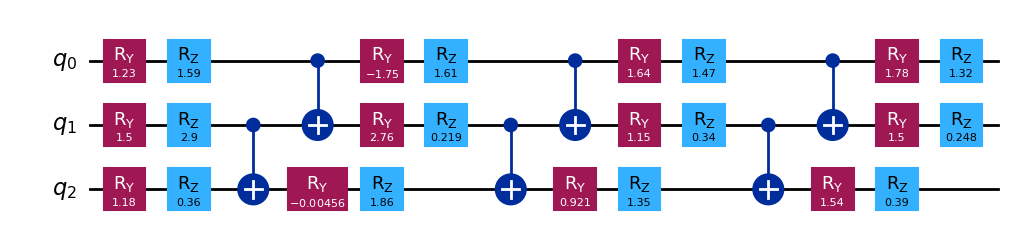

In [44]:
theta = result.x # Final optimized parameters
ansatz = raw_ansatz.assign_parameters(theta)
ansatz.decompose().draw('mpl')

## Quantum results

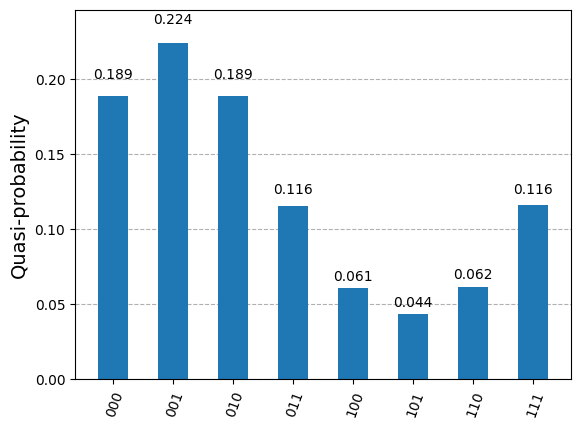

In [45]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

ideal_distribution = Statevector.from_instruction(ansatz).probabilities_dict()
plot_histogram(ideal_distribution)

In [46]:
# Solution (quantum)
y = np.real(list(ideal_distribution.values())) # probabilities
x = np.sqrt(y) # amplitudes
print(x)

[0.43439928 0.47328294 0.43444873 0.3404857  0.24718332 0.20952188
 0.24805395 0.34072648]


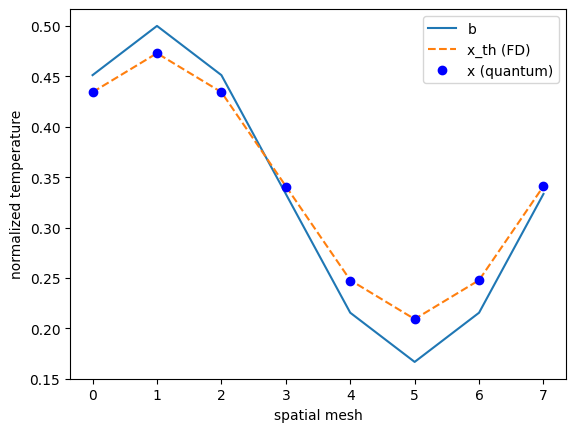

In [47]:
plt.plot(b, label='b')
plt.plot(x_th, label='x_th (FD)', linestyle='dashed')
plt.plot(x, 'bo', label='x (quantum)')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('normalized temperature')
plt.show()

## De-normalization by post-processing

In [48]:
import statistics

x_mean = statistics.mean(x)
T_mean = statistics.mean(T_old)
scale = T_mean/x_mean
print(scale)
print(x0)
print(b0)
print(f)
print(x0/b0)

print(f"\nscale = {scale}")
T_new_q = x*scale

# T_new_q (quantum)
#T_new_q = x*x0
#print(T_new_q)

2.9324413668588494
2.932275387639925
3.0
0.9774251292133083
0.9774251292133083

scale = 2.9324413668588494


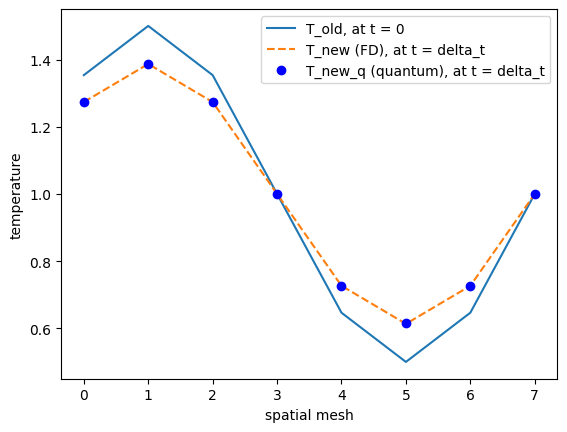

In [49]:
plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (quantum), at t = delta_t')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('temperature')
plt.show()

## Short-cut

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 2.5001563319637654e-11
       x: [ 2.942e+00  2.056e+00 ...  2.003e+00  1.371e+00]
    nfev: 7887
   maxcv: 0.0
Time (s): 78.58431386947632


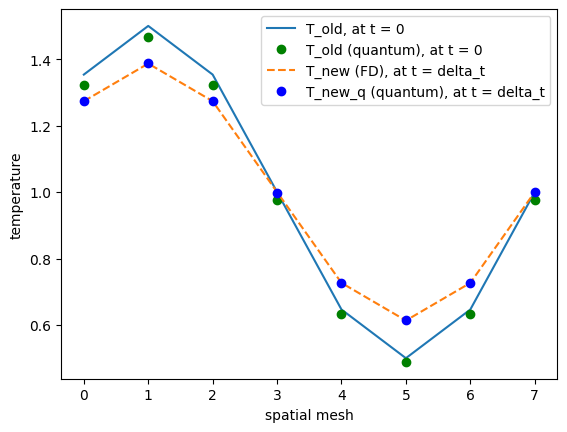

In [50]:
O_old = np.identity(N)-np.outer(b,b)
observable_old = SparsePauliOp.from_operator(O_old)

result_old = minimize(cost_func_vqe, theta0, args=(raw_ansatz.decompose(), observable_old, estimator), 
                  method="COBYLA", 
                  tol = 1e-6, # better tolerance is possible but it would require more iterations/time
                  options={'maxiter': 1000000, 'disp': True})
print(result_old)
end_time = time.time()
execution_time = end_time - start_time
print(f"""Time (s): {execution_time}""")

theta_old = result_old.x # Final optimized parameters
ansatz_old = raw_ansatz.assign_parameters(theta_old)

ideal_distribution_old = Statevector.from_instruction(ansatz_old).probabilities_dict()
y_old = np.real(list(ideal_distribution_old.values())) # probabilities
x_old = np.sqrt(y_old) # amplitudes
T_old_q = x_old*scale

plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_old_q, 'go', label='T_old (quantum), at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (quantum), at t = delta_t')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('temperature')
plt.show()

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 1.5405953557996038e-05
       x: [ 2.981e+00  2.012e+00 ...  1.998e+00  1.407e+00]
    nfev: 400
   maxcv: 0.0
Time (s): 83.2999997138977


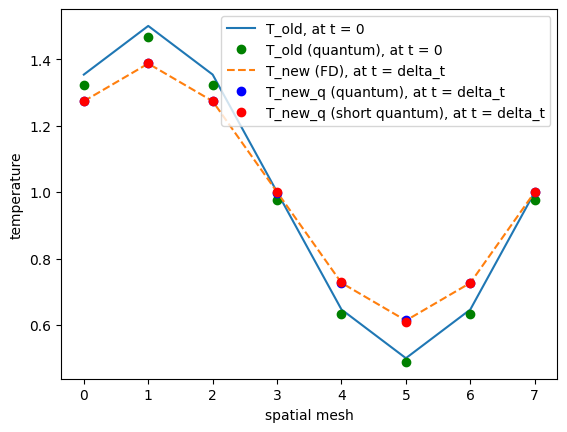

In [51]:
result_new = minimize(cost_func_vqe, theta_old, args=(raw_ansatz.decompose(), observable_1, estimator), 
                  method="COBYLA", 
                  tol = 1e-3, # better tolerance is possible but it would require more iterations/time
                  options={'maxiter': 1000000, 'disp': True})
print(result_new)
end_time = time.time()
execution_time = end_time - start_time
print(f"""Time (s): {execution_time}""")

theta_new = result_new.x # Final optimized parameters
ansatz_new = raw_ansatz.assign_parameters(theta_new)

ideal_distribution_new = Statevector.from_instruction(ansatz_new).probabilities_dict()
y_new = np.real(list(ideal_distribution_new.values())) # probabilities
x_new = np.sqrt(y_new) # amplitudes
T_new_new_q = x_new*scale

plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_old_q, 'go', label='T_old (quantum), at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (quantum), at t = delta_t')
plt.plot(T_new_new_q, 'ro', label='T_new_q (short quantum), at t = delta_t')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('temperature')
plt.show()

## VQE by Qrisp

In [52]:
import qrisp
qrisp.__package__

'qrisp'

In [53]:
# RUN ON AER simulator 
from qrisp.interface import QiskitBackend
from qiskit_aer import AerSimulator

# RUN ON IQM Garnet 
from qrisp.interface import IQMBackend
#qrisp_garnet = IQMBackend(api_token = "PUT-YOUR-TOKEN", 
#                          device_instance = "garnet")
#qrisp_sirius = IQMBackend(api_token = "PUT-YOUR-TOKEN", 
#                          device_instance = "sirius")

In [54]:
from qrisp import *
from qrisp.operators import QubitOperator
from qrisp.operators.qubit import X,Y,Z
from qrisp.vqe.vqe_problem import *

# Hamiltonian
# prefactor for improving accuracy:
# 15 >>>  1m >>> acceptable results
# 20 >>>  3m >>> acceptable results (best)
# 25 >>>  3m >>> acceptable results
# 30 >>>  7m >>> acceptable results
# 40 >>> 16m >>> not-so-good results
H = QubitOperator.from_matrix(O).to_pauli() # original
#H = 20 * QubitOperator.from_matrix(O).to_pauli() # enhanced
#H = QubitOperator.from_matrix(DFOF).to_pauli() # diagonal >>> can the precision be decreased ?
#H = QubitOperator.from_matrix(FOF).to_pauli() # Fourier transformed >>> can the precision be decreased ?

# Ansatz
def ansatz(qv,theta):
    for i in range(num_qubits):
        ry(theta[i],qv[i])
    for i in range(num_qubits-1):
        cx(qv[i],qv[i+1])
    cx(qv[2],qv[0])

vqe = VQEProblem(hamiltonian = H,
                 ansatz_function = ansatz,
                 num_params = 3,
                 callback = True)

repetitions = 30

all_energy = np.empty(repetitions)
best_energy = float('inf')
best_k = 0
until_repetitions = 0

all_results = np.empty(repetitions, dtype = object)

for k in range(repetitions):
    qarg = QuantumVariable(num_qubits)
    energy = vqe.run(qarg,
                depth = 4,
                max_iter = 1000,
                mes_kwargs={'precision':0.025,'diagonalisation_method':'commuting'} # RUN ON SIMULATOR
                #mes_kwargs={'backend':qrisp_garnet,'precision':0.025,'diagonalisation_method':'commuting'} # RUN ON IQM Garnet 
                #mes_kwargs={'backend':qrisp_sirius,'precision':0.025,'diagonalisation_method':'commuting'} # RUN ON IQM Sirius (cheaper)
                )
    all_results[k] = qarg.get_measurement(shots = 20000)
    #all_results[k] = qarg.get_measurement(shots = 20000, backend = qrisp_garnet)
    #all_results[k] = qarg.get_measurement(shots = 20000, backend = qrisp_sirius) # (cheaper)
    all_energy[k] = energy

    if (abs(energy) < abs(best_energy)):
        best_energy = energy
        best_qarg = qarg
        best_k = k
    
    until_repetitions += 1
    print(f"repetition: {k} energy: {all_energy[k]} best energy: {best_energy}")    
    
    qarg.delete()

qarg = best_qarg

repetition: 0 energy: 0.29815853784058494 best energy: 0.29815853784058494           
repetition: 1 energy: 0.08429765158743864 best energy: 0.08429765158743864           
repetition: 2 energy: 0.11524326598021749 best energy: 0.08429765158743864           
repetition: 3 energy: 0.09475374904566497 best energy: 0.08429765158743864           
repetition: 4 energy: 0.10353319270282638 best energy: 0.08429765158743864           
repetition: 5 energy: 1.7151769859819765 best energy: 0.08429765158743864            
repetition: 6 energy: 1.4154212329101614 best energy: 0.08429765158743864            
repetition: 7 energy: 0.10241724193402425 best energy: 0.08429765158743864           
repetition: 8 energy: 1.2363444334037232 best energy: 0.08429765158743864            
repetition: 9 energy: 0.03256582268098951 best energy: 0.03256582268098951           
repetition: 10 energy: 0.0413150223765291 best energy: 0.03256582268098951           
repetition: 11 energy: 0.05469751761180051 best energy

In [55]:
# ATTENTION
if (1>0): # SAVE
    %store N
    %store num_qubits
    %store all_results
    %store all_energy
    %store best_energy
    %store best_energy
    %store best_k
    %store until_repetitions
    %store T_old
    %store T_new
    %store T_new_q
    %store scale
else: # LOAD
    %store -r N
    %store -r num_qubits
    %store -r all_results
    %store -r all_energy
    %store -r best_energy
    %store -r best_energy
    %store -r best_k
    %store -r until_repetitions
    %store -r T_old
    %store -r T_new
    %store -r T_new_q
    %store -r scale

Stored 'N' (int)
Stored 'num_qubits' (int)
Stored 'all_results' (ndarray)
Stored 'all_energy' (ndarray)
Stored 'best_energy' (float)
Stored 'best_energy' (float)
Stored 'best_k' (int)
Stored 'until_repetitions' (int)
Stored 'T_old' (ndarray)
Stored 'T_new' (ndarray)
Stored 'T_new_q' (ndarray)
Stored 'scale' (float64)


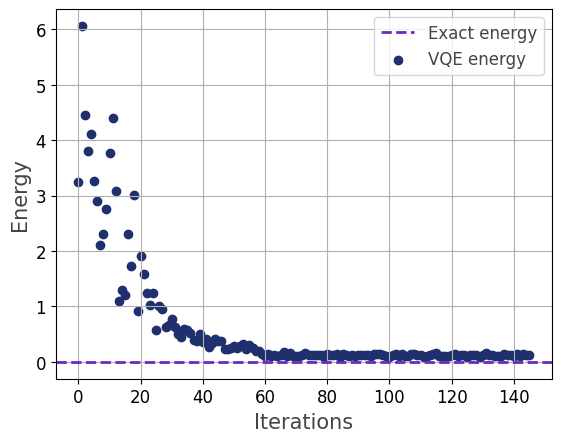

In [56]:
vqe.visualize_energy(exact=True)

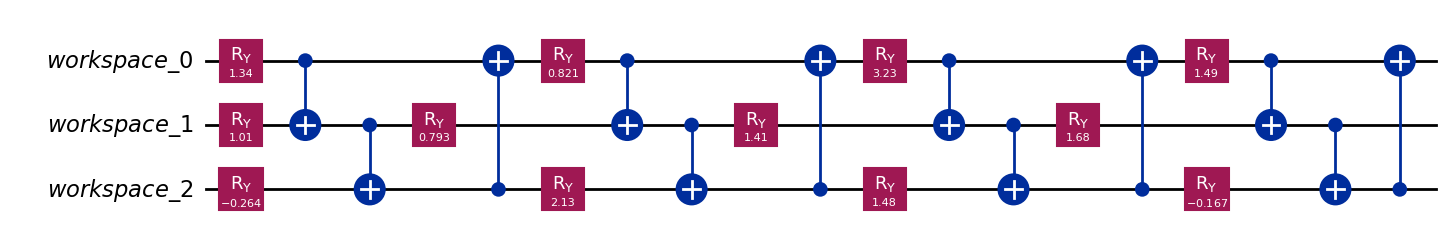

In [57]:
qiskit_qarg = qarg.qs.compile().to_qiskit()
qiskit_qarg.draw("mpl")

In [58]:
import numpy as np

error = np.empty(until_repetitions)
min_error = float('inf')
min_k = 0

all_values = []
for k in range(until_repetitions):
    results = all_results[k]
    # Estrai chiavi e valori
    keys = results.keys()
    values = results.values()

    # Ordina le chiavi in ordine binario crescente
    sorted_keys = sorted(results.keys())

    # Estrai i valori nell'ordine corretto
    sorted_values = [results[k] for k in sorted_keys]

    # Solution (quantum)
    y = np.real(list(sorted_values)) # probabilities
    x = np.sqrt(y) # amplitudes
    T_new_q_iqm = x*scale    

    if T_new.shape == T_new_q_iqm.shape:
        error[k] = np.linalg.norm(T_new - T_new_q_iqm)
    else:
        error[k] = float('inf') 
    if error[k] < min_error:
        min_error = error[k]
        min_k = k

    if T_new_q_iqm.shape == (N,):
        all_values.append(T_new_q_iqm)

    print(f"repetition: {k}({best_k})({min_k}) error: {error[k]}")


repetition: 0(15)(0) error: 1.2580014382432516
repetition: 1(15)(1) error: 0.6374536047910782
repetition: 2(15)(2) error: 0.5635445145767336
repetition: 3(15)(2) error: 0.7424772535614103
repetition: 4(15)(2) error: 0.6839974720899766
repetition: 5(15)(2) error: 1.336822620047615
repetition: 6(15)(2) error: 1.3527954956768118
repetition: 7(15)(7) error: 0.447247322964869
repetition: 8(15)(7) error: 1.9811463177202853
repetition: 9(15)(9) error: 0.3585579988630882
repetition: 10(15)(10) error: 0.33621799250068723
repetition: 11(15)(11) error: 0.2780937181269175
repetition: 12(15)(12) error: 0.18412582895013882
repetition: 13(15)(12) error: 0.6807166552820848
repetition: 14(15)(12) error: 0.9971263479757578
repetition: 15(15)(12) error: 0.2602768346187781
repetition: 16(15)(12) error: 1.2527455329100834
repetition: 17(15)(12) error: 0.28139830438032293
repetition: 18(15)(12) error: 0.980374110020192
repetition: 19(15)(12) error: 0.7050033540680765
repetition: 20(15)(12) error: 1.50106761

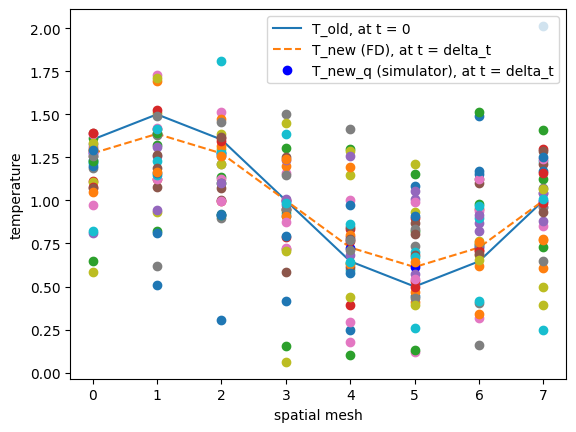

In [59]:
import matplotlib.pyplot as plt

plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (simulator), at t = delta_t')
plt.legend()
plt.xlabel('spatial mesh')
plt.ylabel('temperature')

for k in range(until_repetitions):
    results = all_results[k]
    # Estrai chiavi e valori
    keys = results.keys()
    values = results.values()

    # Ordina le chiavi in ordine binario crescente
    sorted_keys = sorted(results.keys())

    # Estrai i valori nell'ordine corretto
    sorted_values = [results[k] for k in sorted_keys]

    # Solution (quantum)
    y = np.real(list(sorted_values)) # probabilities
    x = np.sqrt(y) # amplitudes
    T_new_q_iqm = x*scale

    plt.plot(T_new_q_iqm, 'o', label='T_new_q (real IQM), at t = delta_t')

#plt.title('All results by Qrisp with 'precision':0.025')
plt.show()


(30, 8)


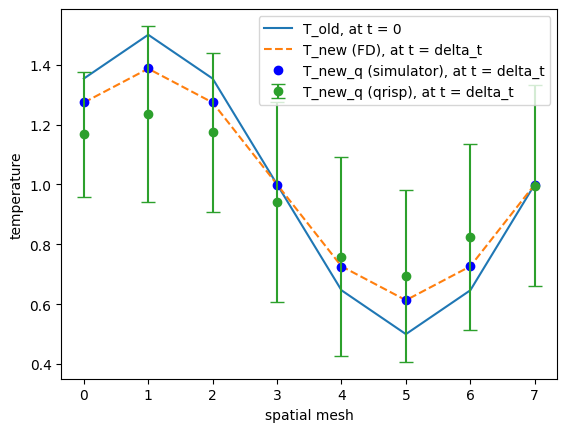

In [60]:
plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (simulator), at t = delta_t')
plt.xlabel('spatial mesh')
plt.ylabel('temperature')

# Trasformiamo la lista di vettori in un array 2D: (30,8)
all_values = np.array(all_values)
print(all_values.shape)

# Ora calcoliamo:
mean_T = np.mean(all_values, axis=0)      # Media su ogni elemento
error_bar_T = np.std(all_values, axis=0)  # Errore = deviazione standard

# Plot con barre di errore
plt.errorbar(range(len(mean_T)), mean_T, yerr = error_bar_T, fmt='o', capsize=5, label='T_new_q (qrisp), at t = delta_t')
#plt.title('All results by Qrisp with 'precision':0.025' and error bars')
#plt.grid(True)
plt.legend()
plt.show()


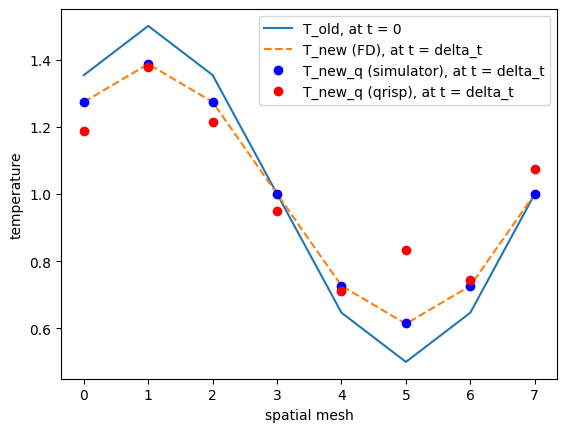

In [61]:
plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (simulator), at t = delta_t')
plt.xlabel('spatial mesh')
plt.ylabel('temperature')

k = best_k # best according to VQE
results = all_results[k]
# Estrai chiavi e valori
keys = results.keys()
values = results.values()

# Ordina le chiavi in ordine binario crescente
sorted_keys = sorted(results.keys())

# Estrai i valori nell'ordine corretto
sorted_values = [results[k] for k in sorted_keys]

# Solution (quantum)
y = np.real(list(sorted_values)) # probabilities
x = np.sqrt(y) # amplitudes
T_new_q_iqm = x*scale

plt.plot(T_new_q_iqm, 'ro', label='T_new_q (qrisp), at t = delta_t')
plt.legend()
#plt.title('Best minimum energy on IQM machine')
plt.show()

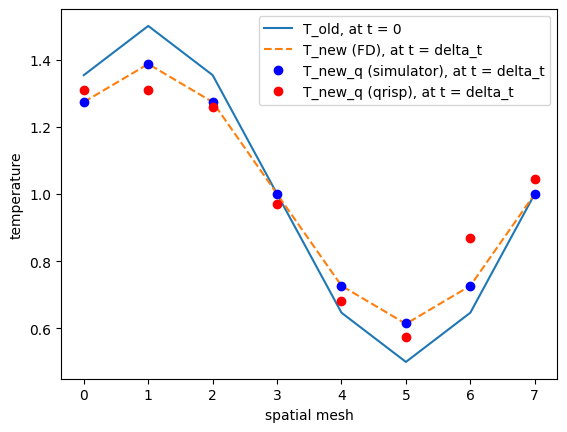

In [62]:
plt.plot(T_old, label='T_old, at t = 0')
plt.plot(T_new, label='T_new (FD), at t = delta_t', linestyle='dashed')
plt.plot(T_new_q, 'bo', label='T_new_q (simulator), at t = delta_t')
plt.xlabel('spatial mesh')
plt.ylabel('temperature')

k = min_k # best matching with FD solution
results = all_results[k]
# Estrai chiavi e valori
keys = results.keys()
values = results.values()

# Ordina le chiavi in ordine binario crescente
sorted_keys = sorted(results.keys())

# Estrai i valori nell'ordine corretto
sorted_values = [results[k] for k in sorted_keys]

# Solution (quantum)
y = np.real(list(sorted_values)) # probabilities
x = np.sqrt(y) # amplitudes
T_new_q_iqm = x*scale

plt.plot(T_new_q_iqm, 'ro', label='T_new_q (qrisp), at t = delta_t')
plt.legend()
#plt.title('Best matching with FD solution on IQM machine')
plt.show()

## VQE by Qrisp and diagonalization

In [63]:
eigenvalues_C = np.ones(N)
for i in range(N):
    eigenvalues_C[i] = 1 + 4*r*(np.sin(np.pi*(i)/N) ** 2)

for elements in eigenvalues_C:
    print(f"{elements:+10.2f}")


     +1.00
     +1.29
     +2.00
     +2.71
     +3.00
     +2.71
     +2.00
     +1.29


In [64]:
from qrisp import *
from qrisp.operators.qubit import X,Y,Z

# QFT: tildeb_bis = mydft @ b
CF = np.matmul(C,np.conj(mydft))
D = np.matmul(mydft,CF)
print(D.shape)
for row in D:
    print("  |  ".join(f"{x:+10.2f}" for x in row))

observable_D = SparsePauliOp.from_operator(D)
print(observable_D)
print(len(observable_D.paulis))


(8, 8)
+1.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  +0.00-0.00j  |  +0.00-0.00j  |  +0.00+0.00j  |  +0.00-0.00j
-0.00-0.00j  |  +1.29+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  +0.00+0.00j
-0.00+0.00j  |  +0.00-0.00j  |  +2.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  +0.00-0.00j
-0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +2.71-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
-0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +0.00+0.00j  |  +3.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
-0.00+0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  +0.00+0.00j  |  -0.00-0.00j  |  +2.71-0.00j  |  -0.00+0.00j  |  -0.00-0.00j
+0.00+0.00j  |  +0.00+0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  +2.00+0.00j  |  -0.00-0.00j
+0.00+0.00j  |  +0.00+0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +1.29-0.00j
S

In [65]:
# QFT: tildeb_bis = mydft @ b
CC = np.transpose(C) @ C
CCF = np.matmul(CC,np.conj(mydft))
DD = np.matmul(mydft,CCF)
print(DD.shape)
for row in DD:
    print("  |  ".join(f"{x:+10.2f}" for x in row))

observable_DD = SparsePauliOp.from_operator(DD)
print(observable_DD)
print(len(observable_DD.paulis))

(8, 8)
+1.00+0.00j  |  +0.00-0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  +0.00-0.00j  |  +0.00+0.00j  |  +0.00-0.00j
+0.00-0.00j  |  +1.67+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  +0.00+0.00j
+0.00-0.00j  |  +0.00+0.00j  |  +4.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  +0.00-0.00j
+0.00-0.00j  |  +0.00+0.00j  |  +0.00-0.00j  |  +7.33-0.00j  |  +0.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
+0.00+0.00j  |  +0.00-0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  +9.00+0.00j  |  -0.00-0.00j  |  -0.00-0.00j  |  -0.00-0.00j
+0.00+0.00j  |  -0.00-0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00-0.00j  |  +7.33-0.00j  |  -0.00+0.00j  |  -0.00-0.00j
+0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +4.00+0.00j  |  -0.00-0.00j
+0.00+0.00j  |  +0.00+0.00j  |  +0.00+0.00j  |  +0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  -0.00+0.00j  |  +1.67-0.00j
S